In [18]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import os
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download latest version of the data and save the raw version
dataset = 'alexteboul/diabetes-health-indicators-dataset'
download_path = '../Data'

api = KaggleApi()
api.authenticate()

api.dataset_download_files(dataset, path=download_path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


In [12]:
diabetes_df = pd.read_csv('../Data/diabetes_012_health_indicators_BRFSS2015.csv')

In [13]:
diabetes_df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [14]:
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [15]:
diabetes_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [17]:
diabetes_df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [19]:
num_cols = diabetes_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = diabetes_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [25]:
target_col = 'Diabetes_012'
if target_col not in cat_cols and target_col in diabetes_df.columns:
    cat_cols.append(target_col)
    if target_col in num_cols:
        num_cols.remove(target_col)

print(cat_cols)

['Diabetes_012']


| Column Name             | Type                    | Description                                                                                      |
|-------------------------|-------------------------|------------------------------------------------------------------------------------------------|
| **Diabetes_binary**      | Target (binary)          | 0 = no diabetes, 1 = prediabetes or diabetes                                                   |
| **HighBP**              | Feature (binary)          | High blood pressure: 0 = no, 1 = yes                                                           |
| **HighChol**            | Feature (binary)          | High cholesterol: 0 = no, 1 = yes                                                              |
| **CholCheck**           | Feature (binary)          | Cholesterol check in last 5 years: 0 = no, 1 = yes                                             |
| **BMI**                 | Feature (integer)         | Body Mass Index                                                                                |
| **Smoker**              | Feature (binary)          | Have you smoked at least 100 cigarettes in your lifetime? 0 = no, 1 = yes                      |
| **Stroke**              | Feature (binary)          | Ever told you had a stroke? 0 = no, 1 = yes                                                   |
| **HeartDiseaseorAttack** | Feature (binary)          | Coronary heart disease or myocardial infarction: 0 = no, 1 = yes                               |
| **PhysActivity**        | Feature (binary)          | Physical activity in past 30 days (excluding job): 0 = no, 1 = yes                             |
| **Fruits**              | Feature (binary)          | Consume fruit 1 or more times per day: 0 = no, 1 = yes                                        |
| **Veggies**             | Feature (binary)          | Consume vegetables 1 or more times per day: 0 = no, 1 = yes                                   |
| **HvyAlcoholConsump**   | Feature (binary)          | Heavy alcohol consumption (men >14 drinks/week, women >7): 0 = no, 1 = yes                     |
| **AnyHealthcare**       | Feature (binary)          | Have any health care coverage: 0 = no, 1 = yes                                               |
| **NoDocbcCost**         | Feature (binary)          | Needed to see a doctor but couldn't because of cost? 0 = no, 1 = yes                          |
| **GenHlth**             | Feature (integer)         | General health rating (1-5): 1 = excellent, 5 = poor                                         |
| **MentHlth**            | Feature (integer)         | Number of days mental health was not good in past 30 days                                    |
| **PhysHlth**            | Feature (integer)         | Number of days physical health was not good in past 30 days                                  |
| **DiffWalk**            | Feature (binary)          | Serious difficulty walking or climbing stairs? 0 = no, 1 = yes                               |
| **Sex**                 | Feature (binary)          | Sex: 0 = female, 1 = male                                                                      |
| **Age**                 | Feature (integer)         | Age category (1-13), e.g. 1 = 18-24, 13 = 80 or older                                        |
| **Education**           | Feature (integer)         | Education level (1-6), from 1 = never attended school to 6 = college graduate                 |
| **Income**              | Feature (integer)         | Income scale (1-8), e.g. 1 = less than $10,000, 8 = $75,000 or more                          |


In [26]:
print(num_cols)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


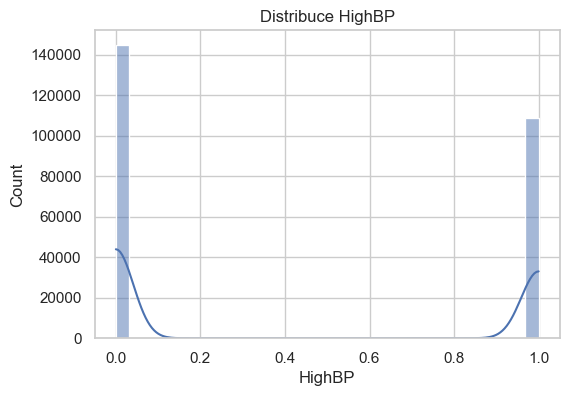

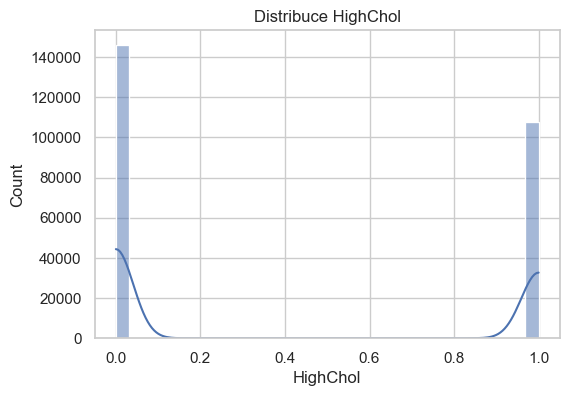

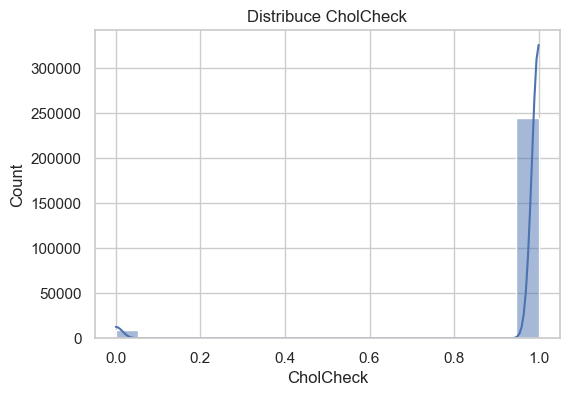

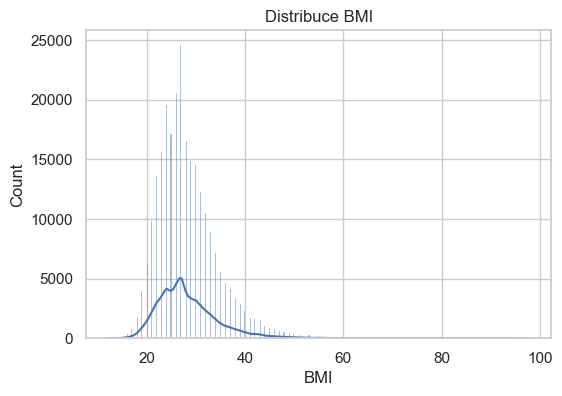

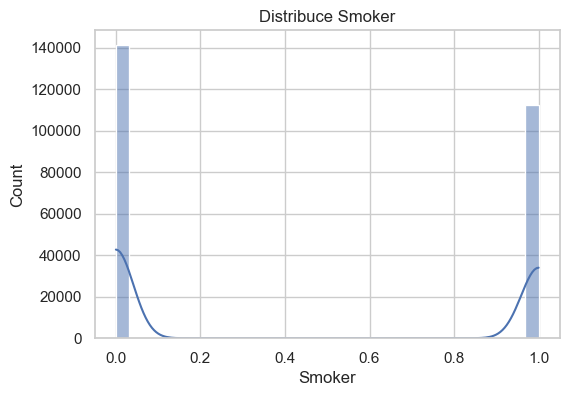

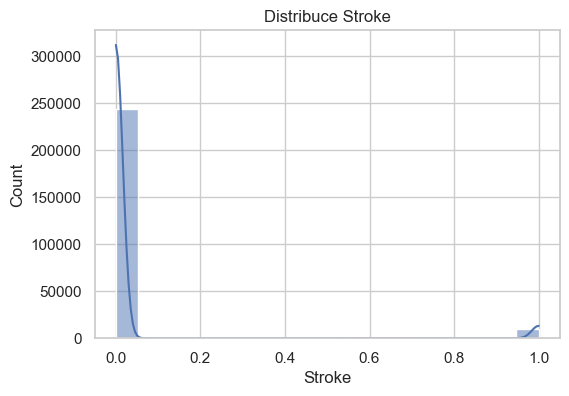

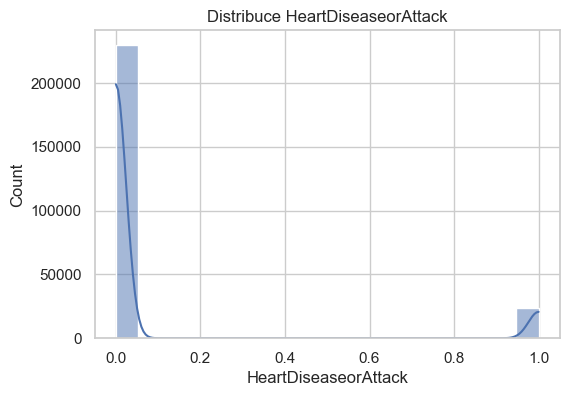

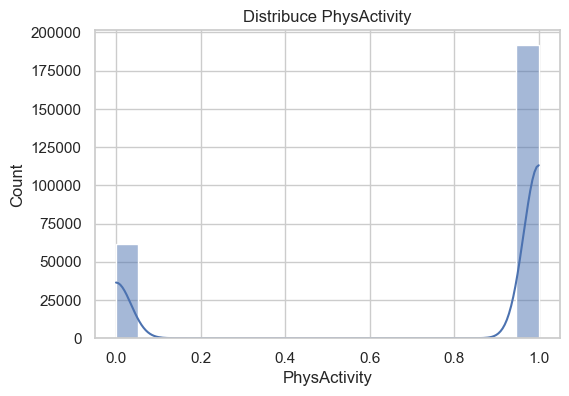

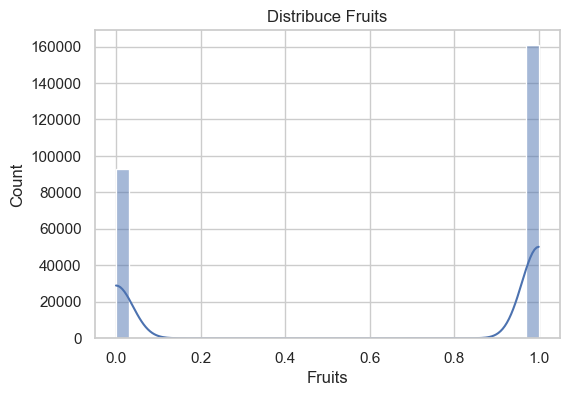

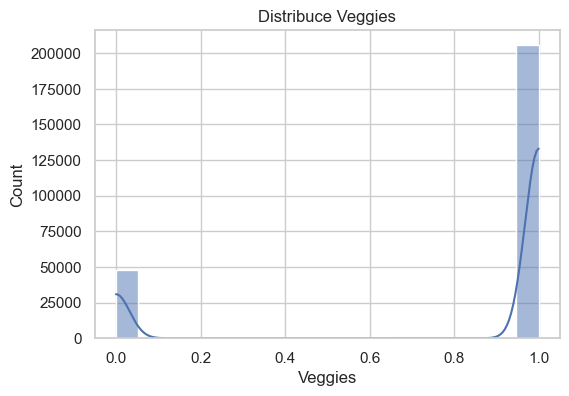

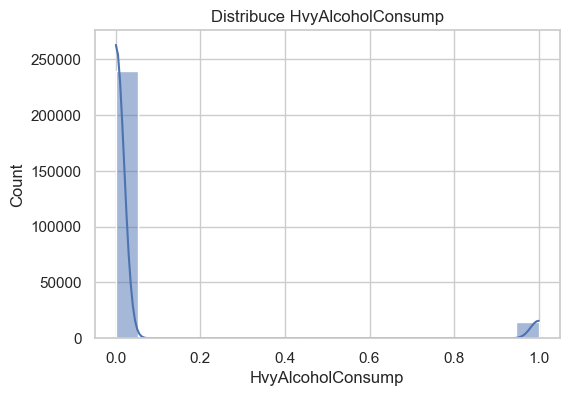

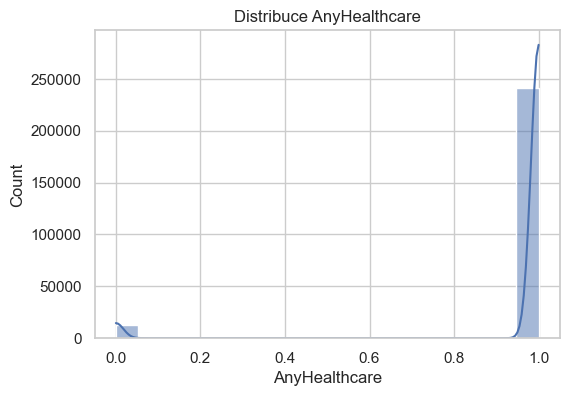

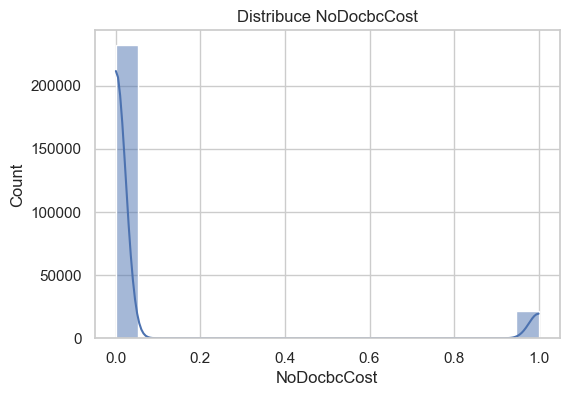

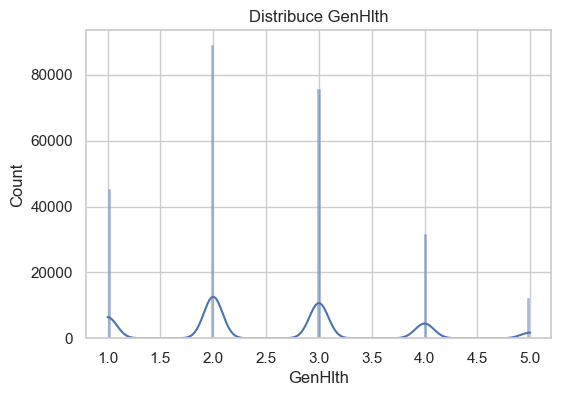

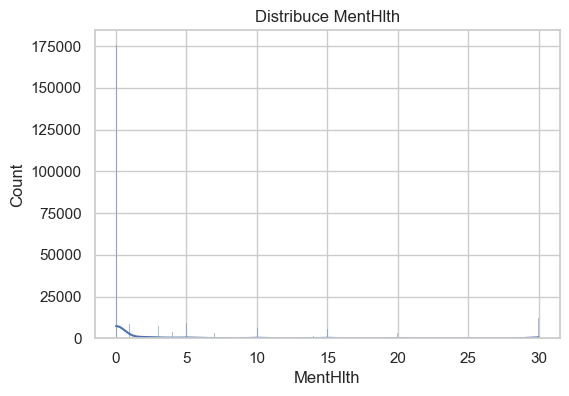

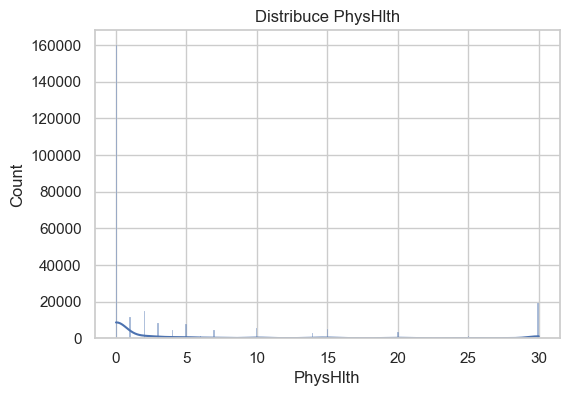

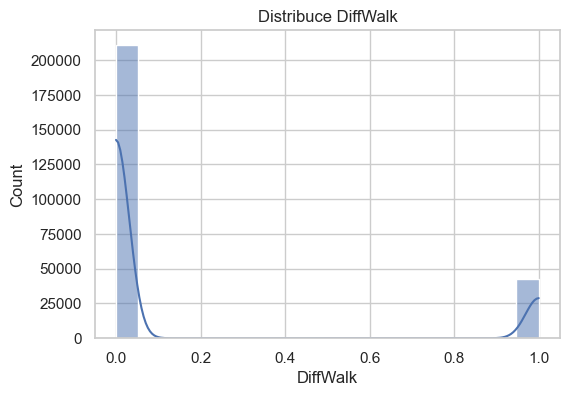

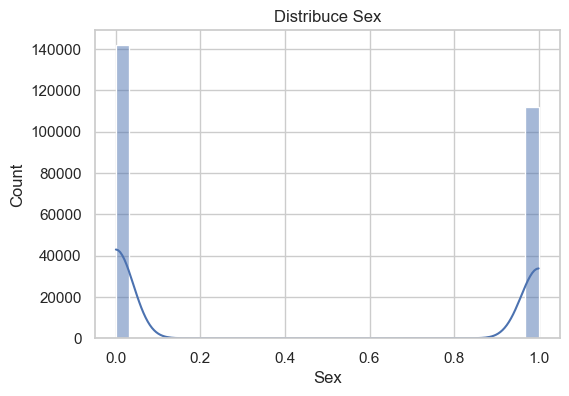

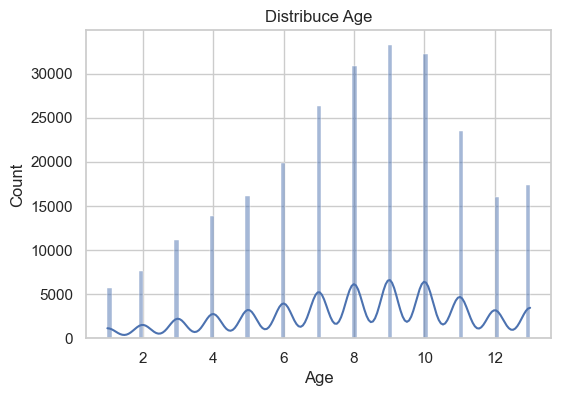

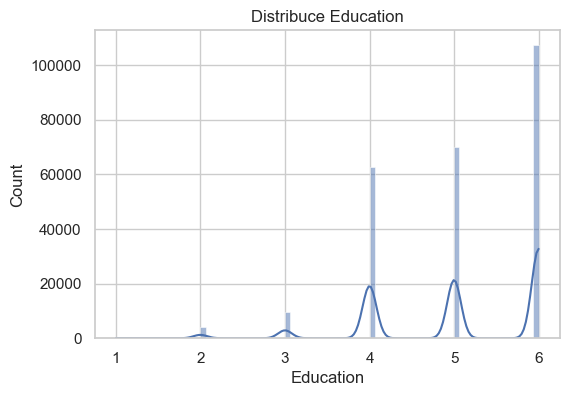

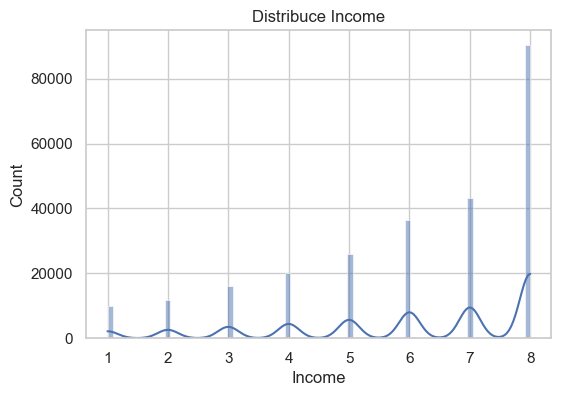

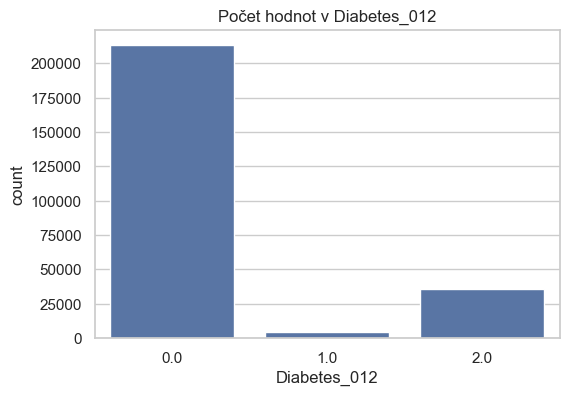

In [27]:
sns.set(style="whitegrid")

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(diabetes_df[col].dropna(), kde=True)
    plt.title(f'Distribuce {col}')
    plt.show()


for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=diabetes_df)
    plt.title(f'Počet hodnot v {col}')
    plt.show()

The dataset is unbalanced but we can work with that with eaither SMOTE or catching/focusing on the important values in the ML so that we can get the results we want and furthemore in the real world we do not always work with balanced data so this should help simulate real world issue.